In [ ]:
from google.colab import drive
from tensorflow.keras.utils import image_dataset_from_directory
from PIL import Image
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = 'content/drive/Shared drives/BA865/Fruits_Vegetables_Dataset/Splitted'

# Image Data Cleaning

In [ ]:
#Since our image dataset contain filetypes that TensorFlow cannot handle (.webp files..), we need to do some cleaning

!ls -I "*.jpg" -I "*.png" -I "*.JPG" -I "*.jpeg" -lR /content/drive/Shareddrives/BA865/Fruits_Vegetables_Dataset/Splitted/train

/content/drive/Shareddrives/BA865/Fruits_Vegetables_Dataset/Splitted/train:
total 80
drwx------ 2 root root 4096 Apr 15 04:37 FreshApple
drwx------ 2 root root 4096 Apr 15 04:38 FreshBanana
drwx------ 2 root root 4096 Apr 15 04:34 FreshBellpepper
drwx------ 2 root root 4096 Apr 15 04:35 FreshCarrot
drwx------ 2 root root 4096 Apr 15 04:35 FreshCucumber
drwx------ 2 root root 4096 Apr 15 04:37 FreshMango
drwx------ 2 root root 4096 Apr 15 04:36 FreshOrange
drwx------ 2 root root 4096 Apr 15 04:33 FreshPotato
drwx------ 2 root root 4096 Apr 15 04:36 FreshStrawberry
drwx------ 2 root root 4096 Apr 15 04:34 FreshTomato
drwx------ 2 root root 4096 Apr 15 04:37 RottenApple
drwx------ 2 root root 4096 Apr 15 04:38 RottenBanana
drwx------ 2 root root 4096 Apr 15 04:34 RottenBellpepper
drwx------ 2 root root 4096 Apr 15 04:35 RottenCarrot
drwx------ 2 root root 4096 Apr 15 04:34 RottenCucumber
drwx------ 2 root root 4096 Apr 15 04:36 RottenMango
drwx------ 2 root root 4096 Apr 15 04:37 RottenOr

In [ ]:
!ls -I "*.jpg" -I "*.png" -I "*.JPG" -I "*.jpeg" -lR /content/drive/Shareddrives/BA865/Fruits_Vegetables_Dataset/Splitted/test

/content/drive/Shareddrives/BA865/Fruits_Vegetables_Dataset/Splitted/test:
total 80
drwx------ 2 root root 4096 Apr 15 04:37 FreshApple
drwx------ 2 root root 4096 Apr 15 04:38 FreshBanana
drwx------ 2 root root 4096 Apr 15 04:34 FreshBellpepper
drwx------ 2 root root 4096 Apr 15 04:36 FreshCarrot
drwx------ 2 root root 4096 Apr 15 04:35 FreshCucumber
drwx------ 2 root root 4096 Apr 15 04:37 FreshMango
drwx------ 2 root root 4096 Apr 15 04:36 FreshOrange
drwx------ 2 root root 4096 Apr 15 04:33 FreshPotato
drwx------ 2 root root 4096 Apr 15 04:37 FreshStrawberry
drwx------ 2 root root 4096 Apr 15 04:35 FreshTomato
drwx------ 2 root root 4096 Apr 15 04:37 RottenApple
drwx------ 2 root root 4096 Apr 15 04:38 RottenBanana
drwx------ 2 root root 4096 Apr 15 04:34 RottenBellpepper
drwx------ 2 root root 4096 Apr 15 04:35 RottenCarrot
drwx------ 2 root root 4096 Apr 15 04:34 RottenCucumber
drwx------ 2 root root 4096 Apr 15 04:36 RottenMango
drwx------ 2 root root 4096 Apr 15 04:38 RottenOra

In [ ]:
!ls -I "*.jpg" -I "*.png" -I "*.JPG" -I "*.jpeg" -lR /content/drive/Shareddrives/BA865/Fruits_Vegetables_Dataset/Splitted/val

/content/drive/Shareddrives/BA865/Fruits_Vegetables_Dataset/Splitted/val:
total 80
drwx------ 2 root root 4096 Apr 15 04:37 FreshApple
drwx------ 2 root root 4096 Apr 15 04:38 FreshBanana
drwx------ 2 root root 4096 Apr 15 04:34 FreshBellpepper
drwx------ 2 root root 4096 Apr 15 04:36 FreshCarrot
drwx------ 2 root root 4096 Apr 15 04:35 FreshCucumber
drwx------ 2 root root 4096 Apr 15 04:37 FreshMango
drwx------ 2 root root 4096 Apr 15 04:36 FreshOrange
drwx------ 2 root root 4096 Apr 15 04:33 FreshPotato
drwx------ 2 root root 4096 Apr 15 04:37 FreshStrawberry
drwx------ 2 root root 4096 Apr 15 04:35 FreshTomato
drwx------ 2 root root 4096 Apr 15 04:37 RottenApple
drwx------ 2 root root 4096 Apr 15 04:38 RottenBanana
drwx------ 2 root root 4096 Apr 15 04:34 RottenBellpepper
drwx------ 2 root root 4096 Apr 15 04:35 RottenCarrot
drwx------ 2 root root 4096 Apr 15 04:34 RottenCucumber
drwx------ 2 root root 4096 Apr 15 04:36 RottenMango
drwx------ 2 root root 4096 Apr 15 04:37 RottenOran

In [ ]:
!apt install webp

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  freeglut3
The following NEW packages will be installed:
  freeglut3 webp
0 upgraded, 2 newly installed, 0 to remove and 24 not upgraded.
Need to get 152 kB of archives.
After this operation, 631 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 freeglut3 amd64 2.8.1-3 [73.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 webp amd64 0.6.1-2ubuntu0.20.04.1 [78.7 kB]
Fetched 152 kB in 1s (212 kB/s)
Selecting previously unselected package freeglut3:amd64.
(Reading database ... 122352 files and directories currently installed.)
Preparing to unpack .../freeglut3_2.8.1-3_amd64.deb ...
Unpacking freeglut3:amd64 (2.8.1-3) ...
Selecting previously unselected package webp.
Preparing to unpack .../webp_0.6.1-2ubuntu0.20.04.1_amd64.deb ...
Unpacking webp (0.6.1-2ubuntu0.20.04

Identifying and deleting all .webp files

In [ ]:
!find /content/drive/Shareddrives/BA865/Fruits_Vegetables_Dataset/Splitted/test -maxdepth 2 -name "*.webp" -type f -delete
!find /content/drive/Shareddrives/BA865/Fruits_Vegetables_Dataset/Splitted/train -maxdepth 2 -name "*.webp" -type f -delete
!find /content/drive/Shareddrives/BA865/Fruits_Vegetables_Dataset/Splitted/val -maxdepth 2 -name "*.webp" -type f -delete

now they are gone

In [ ]:
!ls -I "*.jpg" -I "*.png" -I "*.JPG" -I "*.jpeg" -lR /content/drive/Shareddrives/BA865/Fruits_Vegetables_Dataset/Splitted/train

/content/drive/Shareddrives/BA865/Fruits_Vegetables_Dataset/Splitted/train:
total 80
drwx------ 2 root root 4096 Apr 15 04:37 FreshApple
drwx------ 2 root root 4096 Apr 15 04:38 FreshBanana
drwx------ 2 root root 4096 Apr 15 04:34 FreshBellpepper
drwx------ 2 root root 4096 Apr 15 04:35 FreshCarrot
drwx------ 2 root root 4096 Apr 15 04:35 FreshCucumber
drwx------ 2 root root 4096 Apr 15 04:37 FreshMango
drwx------ 2 root root 4096 Apr 15 04:36 FreshOrange
drwx------ 2 root root 4096 Apr 15 04:33 FreshPotato
drwx------ 2 root root 4096 Apr 15 04:36 FreshStrawberry
drwx------ 2 root root 4096 Apr 15 04:34 FreshTomato
drwx------ 2 root root 4096 Apr 15 04:37 RottenApple
drwx------ 2 root root 4096 Apr 15 04:38 RottenBanana
drwx------ 2 root root 4096 Apr 15 04:34 RottenBellpepper
drwx------ 2 root root 4096 Apr 15 04:35 RottenCarrot
drwx------ 2 root root 4096 Apr 15 04:34 RottenCucumber
drwx------ 2 root root 4096 Apr 15 04:36 RottenMango
drwx------ 2 root root 4096 Apr 15 04:37 RottenOr

There are also images with extension set as "png" "jpg" and yet they are not in fact the correct file type (eg. webp file with an extension of 'jpg'..)

- Code to find invalid images and delete them

In [ ]:
import os
import cv2
import imghdr

def check_images( s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:
                f_path=os.path.join (klass_path,f)
                tip = imghdr.what(f_path)
                if ext_list.count(tip) == 0:
                  bad_images.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

source_dir =r'/content/drive/Share ddrives/BA865/Fruits_Vegetables_Dataset/Splitted/train'

good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print(bad_file_list[i])
        print(f'Deleting {bad_file_list[i]}.')
        os.remove(bad_file_list[i])
else:
    print(' no improper image files were found')

processing class directory  RottenTomato
processing class directory  FreshPotato
processing class directory  RottenPotato
processing class directory  FreshBellpepper
processing class directory  RottenCucumber
processing class directory  RottenBellpepper
processing class directory  FreshTomato
processing class directory  FreshCucumber
processing class directory  RottenCarrot
processing class directory  FreshCarrot
processing class directory  RottenMango
processing class directory  RottenStrawberry
processing class directory  FreshOrange
processing class directory  FreshStrawberry
processing class directory  FreshMango
processing class directory  RottenApple
processing class directory  FreshApple
processing class directory  RottenOrange
processing class directory  RottenBanana
processing class directory  FreshBanana
 no improper image files were found


In [ ]:
source_dir2 =r'/content/drive/Share ddrives/BA865/Fruits_Vegetables_Dataset/Splitted/test'

good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir2, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print(bad_file_list[i])
        print(f'Deleting {bad_file_list[i]}.')
        os.remove(bad_file_list[i])
else:
    print(' no improper image files were found')

processing class directory  RottenTomato
processing class directory  FreshPotato
processing class directory  RottenPotato
processing class directory  FreshBellpepper
processing class directory  RottenCucumber
processing class directory  RottenBellpepper
processing class directory  FreshTomato
processing class directory  FreshCucumber
processing class directory  RottenCarrot
processing class directory  FreshCarrot
processing class directory  RottenMango
processing class directory  RottenStrawberry
processing class directory  FreshOrange
processing class directory  FreshStrawberry
processing class directory  FreshMango
processing class directory  RottenApple
processing class directory  FreshApple
processing class directory  RottenOrange
processing class directory  RottenBanana
processing class directory  FreshBanana
improper image files are listed below
/content/drive/Share ddrives/BA865/Fruits_Vegetables_Dataset/Splitted/test/RottenTomato/rottenTomato (76).jpg
Deleting /content/drive/Sh

In [ ]:
source_dir3 =r'/content/drive/Share ddrives/BA865/Fruits_Vegetables_Dataset/Splitted/val'

good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir3, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print(bad_file_list[i])
        print(f'Deleting {bad_file_list[i]}.')
        os.remove(bad_file_list[i])
else:
    print(' no improper image files were found')

processing class directory  RottenTomato
processing class directory  FreshPotato
processing class directory  RottenPotato
processing class directory  FreshBellpepper
processing class directory  RottenCucumber
processing class directory  RottenBellpepper
processing class directory  FreshTomato
processing class directory  FreshCucumber
processing class directory  RottenCarrot
processing class directory  FreshCarrot
processing class directory  RottenMango
processing class directory  RottenStrawberry
processing class directory  FreshOrange
processing class directory  FreshStrawberry
processing class directory  FreshMango
processing class directory  RottenApple
processing class directory  FreshApple
processing class directory  RottenOrange
processing class directory  RottenBanana
processing class directory  FreshBanana
 no improper image files were found


In [ ]:
base_dir = "/content/drive/Shareddrives/BA865/Fruits_Vegetables_Dataset/Splitted"

train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Train generator
train_generator = image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
    #class_mode='categorical'
)

# Validation generator
validation_generator = image_dataset_from_directory(
    validation_dir,
    image_size=(224, 224),
    batch_size=32,
    #class_mode='categorical'
)

# Test generator
test_generator = image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32,
    #class_mode='categorical',
    #shuffle=False
)


Found 6966 files belonging to 20 classes.
Found 2313 files belonging to 20 classes.
Found 2335 files belonging to 20 classes.


In [ ]:
# Get the class names from the train dataset
class_names = train_generator.class_names
print("Class names:", class_names)

# Create a dictionary mapping class names to their indices
class_indices = dict(zip(class_names, range(len(class_names))))
print("Class indices:", class_indices)

# Get the number of classes
num_classes = len(class_names)
print("Number of classes:", num_classes)


Class names: ['FreshApple', 'FreshBanana', 'FreshBellpepper', 'FreshCarrot', 'FreshCucumber', 'FreshMango', 'FreshOrange', 'FreshPotato', 'FreshStrawberry', 'FreshTomato', 'RottenApple', 'RottenBanana', 'RottenBellpepper', 'RottenCarrot', 'RottenCucumber', 'RottenMango', 'RottenOrange', 'RottenPotato', 'RottenStrawberry', 'RottenTomato']
Class indices: {'FreshApple': 0, 'FreshBanana': 1, 'FreshBellpepper': 2, 'FreshCarrot': 3, 'FreshCucumber': 4, 'FreshMango': 5, 'FreshOrange': 6, 'FreshPotato': 7, 'FreshStrawberry': 8, 'FreshTomato': 9, 'RottenApple': 10, 'RottenBanana': 11, 'RottenBellpepper': 12, 'RottenCarrot': 13, 'RottenCucumber': 14, 'RottenMango': 15, 'RottenOrange': 16, 'RottenPotato': 17, 'RottenStrawberry': 18, 'RottenTomato': 19}
Number of classes: 20


In [ ]:
for data_batch, labels_batch in train_generator:
     print("data batch shape:", data_batch.shape)
     print("labels batch shape:", labels_batch.shape)
     break


data batch shape: (32, 224, 224, 3)
labels batch shape: (32,)


#  Neural network with a pre-trained model base VGG16



Now construct the network with a pre-trained model VGG16 inside it

In [ ]:
# this is a model using VGG pre-processing in place of our own CNN blocks...
from tensorflow import keras
from tensorflow.keras import layers

conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False # FREEZING THE LAYERS IN THE MODEL.

data_augmentation = keras.Sequential([
   layers.RandomFlip("horizontal"),
   layers.RandomRotation(0.1),
   layers.RandomZoom(0.2),
])



inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
outputs = layers.Dense(20, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0      

Compiling..

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
model_path = "content/drive/Shared drive/BA865/Fruits_Vegetables_Dataset/"
#save the best model among these 30 epoch
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath= model_path + "my_model.h5",
        save_best_only=True,
        monitor="val_accuracy")
]


history = model.fit(train_generator,
          epochs=30,
          validation_data=validation_generator,
          callbacks=callbacks
          #steps_per_epoch=len(train_generator)/4,
          #validation_steps = len(validation_generator)/4
          )

Epoch 1/30
218/218 [==============================] - 1344s 6s/step - loss: 34.6984 - accuracy: 0.7508 - val_loss: 30.2246 - val_accuracy: 0.8335
Epoch 2/30
218/218 [==============================] - 55s 247ms/step - loss: 15.0375 - accuracy: 0.8798 - val_loss: 30.4014 - val_accuracy: 0.8292
Epoch 3/30
218/218 [==============================] - 52s 236ms/step - loss: 10.2624 - accuracy: 0.9080 - val_loss: 19.6083 - val_accuracy: 0.9036
Epoch 4/30
218/218 [==============================] - 54s 241ms/step - loss: 9.0015 - accuracy: 0.9256 - val_loss: 17.9113 - val_accuracy: 0.9075
Epoch 5/30
218/218 [==============================] - 56s 252ms/step - loss: 6.1345 - accuracy: 0.9400 - val_loss: 18.5931 - val_accuracy: 0.9105
Epoch 6/30
218/218 [==============================] - 61s 274ms/step - loss: 5.8446 - accuracy: 0.9442 - val_loss: 18.8743 - val_accuracy: 0.9010
Epoch 7/30
218/218 [==============================] - 54s 243ms/step - loss: 4.8330 - accuracy: 0.9470 - val_loss: 19.9320

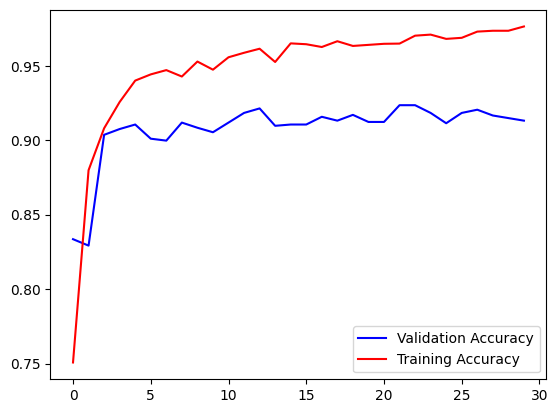

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'],c="b")
plt.plot(history.history['accuracy'],c="r")
plt.legend(['Validation Accuracy','Training Accuracy'])
plt.show()


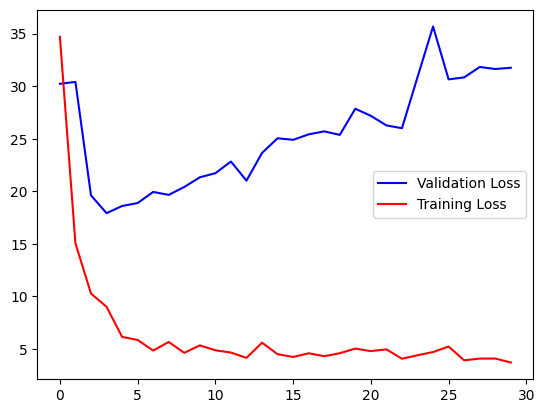

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'],c="b")
plt.plot(history.history['loss'],c="r")
plt.legend(['Validation Loss','Training Loss'])
plt.show()


Using the model associated with the highest accuracy score during 30 epochs to predict on the testing set of our image data.

In [ ]:
import keras
model_path = "content/drive/Shared drive/BA865/Fruits_Vegetables_Dataset/"
best_model = keras.models.load_model(model_path + 'my_model.h5')

In [ ]:
scores = best_model.evaluate(test_generator)
print("Accuracy: %.2f%%" % (scores[1]*100))

73/73 [==============================] - 288s 3s/step - loss: 21.0123 - accuracy: 0.9281
Accuracy: 92.81%


------------

# LIME Image Explainer

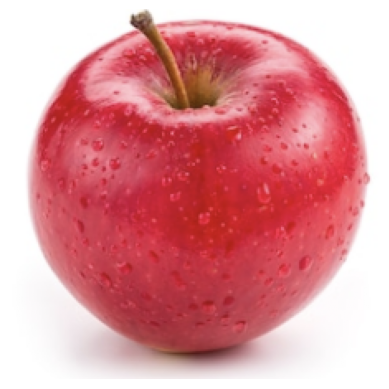

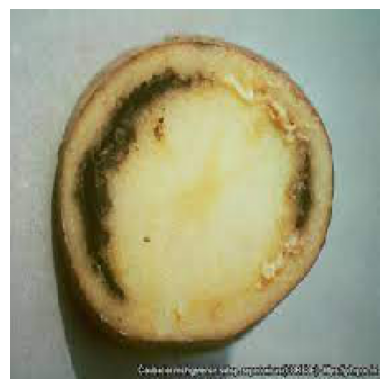

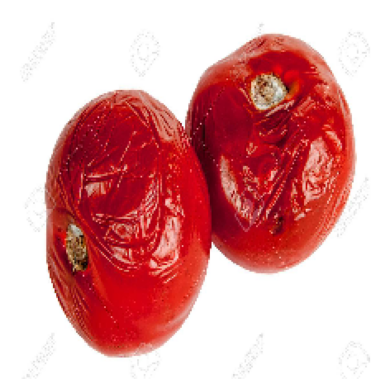

In [ ]:
import matplotlib.pyplot as plt
try:
  import lime
  from lime import lime_image
except ImportError as error:
  !pip install lime
  import lime
  from lime import lime_image

import random
import numpy as np

freshApple_path ="/content/drive/Shareddrives/BA865/Fruits_Vegetables_Dataset/FreshApple/freshApple (1).jpg"

rottenPotato_path ="/content/drive/Shareddrives/BA865/Fruits_Vegetables_Dataset/RottenPotato/rottenPotato (23).jpg"

rottenTomato_path ="/content/drive/Shareddrives/BA865/Fruits_Vegetables_Dataset/RottenTomato/rottenTomato (5).jpg"


def get_img_array(img_path, target_size):
    img = keras.preprocessing.image.load_img(
        img_path, target_size=target_size)
    array = keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

freshApple_tensor = get_img_array(freshApple_path, target_size=(224, 224)).astype('double')


rottenPotato_tensor = get_img_array(rottenPotato_path, target_size=(224, 224)).astype('double')
rottenTomato_tensor = get_img_array(rottenTomato_path, target_size=(224, 224)).astype('double')


freshApple_tensor = np.divide(freshApple_tensor,255)
rottenPotato_tensor = np.divide(rottenPotato_tensor,255)

rottenTomato_tensor = np.divide(rottenTomato_tensor,255)


plt.axis("off")
plt.imshow(freshApple_tensor[0])#.astype("uint8"))
plt.show()

plt.axis("off")
plt.imshow(rottenPotato_tensor[0])#.astype("uint8"))
plt.show()

plt.axis("off")
plt.imshow(rottenTomato_tensor[0])#.astype("uint8"))
plt.show()
#plt.axis("off")
#plt.imshow(dog_tensor[0])#.astype("uint8"))
#plt.show()


In [ ]:
try:
  from skimage.segmentation import mark_boundaries
except ImportError as error:
  !pip install skimage
  from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt


# Instantiate our LIME explainer.
explainer = lime_image.LimeImageExplainer()

# Now use it to 'explain' the first test image.
explanation_freshApple = explainer.explain_instance(freshApple_tensor[0],
                                                    best_model.predict,
                                                    num_samples=1000,
                                                    top_labels=2,
                                                    hide_color=1)

print(f'The most probable label for this image is as follows: {explanation_freshApple.top_labels}.')

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step
The most probable label for this image is as follows: [11, 0].


In the following code blocks, the output images show the super pixels that are most contributing to the prediction of the model...

1/1 [==============================] - 1s 826ms/step
The prediction was: [3.8407609e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 4.3118904e-19 0.0000000e+00 0.0000000e+00
 7.4085720e-31 6.1592376e-01 1.4389864e-09 1.2938330e-07 0.0000000e+00
 0.0000000e+00 2.8915407e-29 2.8456629e-26 0.0000000e+00 6.2999736e-20]


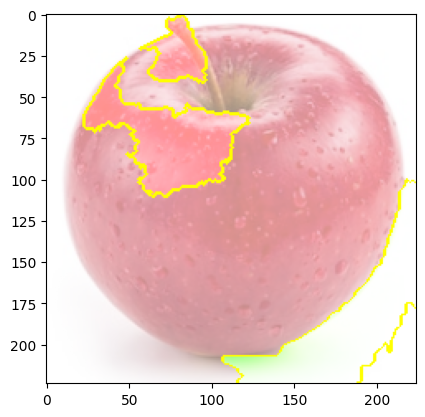

In [ ]:
print(f'The prediction was: {best_model.predict(freshApple_tensor)[0]}')

# positive_only = True means we only display pixels that contributed positively to the respective label.
# Notice for most labels, the pixel contributions are basically 0.
temp, mask = explanation_freshApple.get_image_and_mask(explanation_freshApple.top_labels[0],
                                                       positive_only=False,
                                                       hide_rest=False)
# Add a plot for the associated label

plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

In [ ]:
# Now use it to 'explain' the rottenPotato image.
explanation_rottenPotato = explainer.explain_instance(rottenPotato_tensor[0],
                                                      best_model.predict,
                                                      num_samples=1000,
                                                      top_labels=2,
                                                      hide_color=1)

print(f'The most probable label for this image is as follows: {explanation_rottenPotato.top_labels}.')

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 51ms/step
The most probable label for this image is as follows: [11, 0].


1/1 [==============================] - 0s 22ms/step
The prediction was: [1.5893367e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.3654690e-19 0.0000000e+00 0.0000000e+00
 1.7249791e-30 8.4106624e-01 9.8197084e-10 5.3655121e-08 0.0000000e+00
 0.0000000e+00 5.1468905e-30 1.8212014e-26 0.0000000e+00 7.2049330e-21]


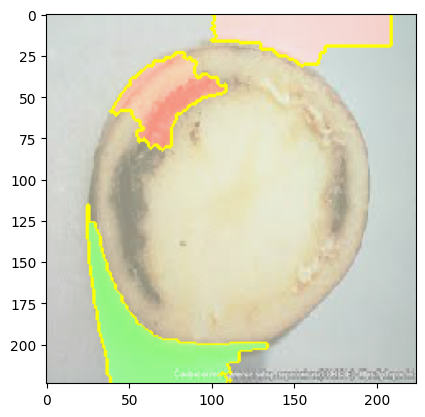

In [ ]:
print(f'The prediction was: {best_model.predict(rottenPotato_tensor)[0]}')

# positive_only = True means we only display pixels that contributed positively to the respective label.
# Notice for most labels, the pixel contributions are basically 0.
temp2, mask2 = explanation_rottenPotato.get_image_and_mask(explanation_rottenPotato.top_labels[0],
                                                           positive_only=False,
                                                           hide_rest=False)
# Add a plot for the associated label

plt.imshow(mark_boundaries(temp2 / 2 + 0.5, mask2))
plt.show()

In [ ]:
# Now use it to 'explain' the rottenTomato image.
explanation_rottenTomato = explainer.explain_instance(rottenTomato_tensor[0],
                                                      best_model.predict,
                                                      num_samples=1000,
                                                      top_labels=2,
                                                      hide_color=1)

print(f'The most probable label for this image is as follows: {explanation_rottenTomato.top_labels}.')

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step
The most probable label for this image is as follows: [11, 0].


1/1 [==============================] - 0s 21ms/step
The prediction was: [1.4035925e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.0101014e-18 0.0000000e+00 0.0000000e+00
 5.4128821e-31 8.5964066e-01 6.8676226e-10 6.5281874e-08 0.0000000e+00
 0.0000000e+00 8.6959837e-30 2.3948400e-26 0.0000000e+00 1.0359255e-20]


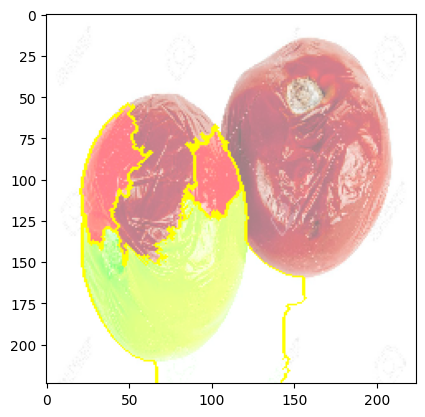

In [ ]:
print(f'The prediction was: {best_model.predict(rottenTomato_tensor)[0]}')

# positive_only = True means we only display pixels that contributed positively to the respective label.
# Notice for most labels, the pixel contributions are basically 0.
temp3, mask3 = explanation_rottenTomato.get_image_and_mask(explanation_rottenTomato.top_labels[0],
                                                           positive_only=False,
                                                           hide_rest=False)
# Add a plot for the associated label

plt.imshow(mark_boundaries(temp3 / 2 + 0.5, mask3))
plt.show()

In [ ]:
prediction = list(best_model.predict(rottenTomato_tensor)[0])
prediction.index(max(prediction))

1/1 [==============================] - 0s 37ms/step


11

In [ ]:
prediction_freshApple = list(best_model.predict(freshApple_tensor)[0])
prediction_freshApple.index(max(prediction_freshApple))

1/1 [==============================] - 0s 21ms/step


11

A layout of the network..

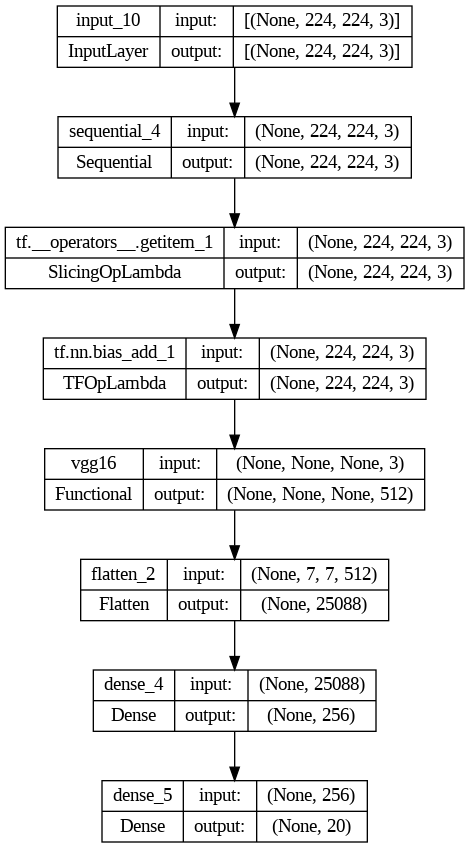

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(best_model, show_shapes=True)